# Predict the  of diabetes based on diagnostic measures

### Problem Definition:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

Data Source: https://www.kaggle.com/uciml/pima-indians-diabetes-database
API: kaggle datasets download -d uciml/pima-indians-diabetes-database


In [47]:
# Load required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

## I. Data Import

### Loading and preparing the data

In [48]:
### Read file
diabetes = pd.read_csv("diabetes.csv")

In [49]:
# View some records
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


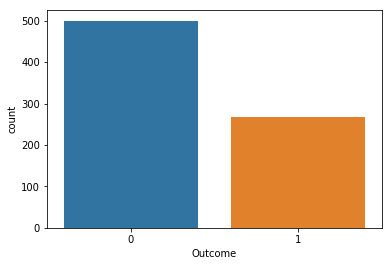

In [50]:
## View count of Outcome - Diabetes outcome
sns.countplot(diabetes.Outcome)

In [51]:
# Descriptive analysis of data
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


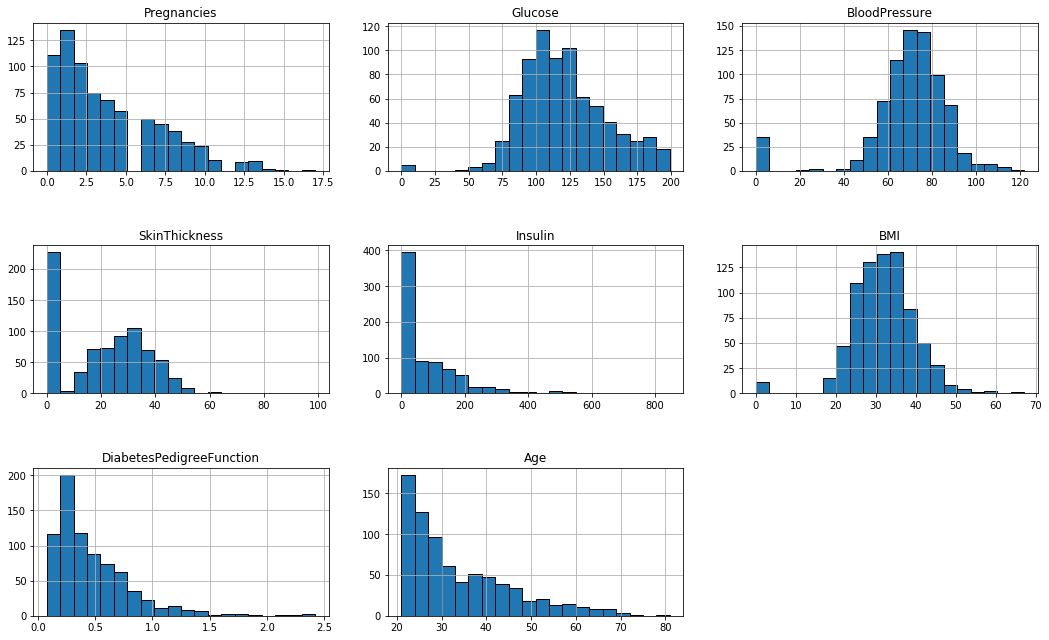

In [52]:
# Analyse the data by visualization
import itertools
columns=diabetes.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diabetes[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

## II. Data Wrangling

In [53]:
# Replace 0's with NaN
diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)
diabetes.head() #Replaced all 0 values by NaN so it is easy to clean the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [54]:
# Fill Mising values with Mean
diabetes.fillna(diabetes.mean(), inplace = True) #Filled Mising values with Mean
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [55]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


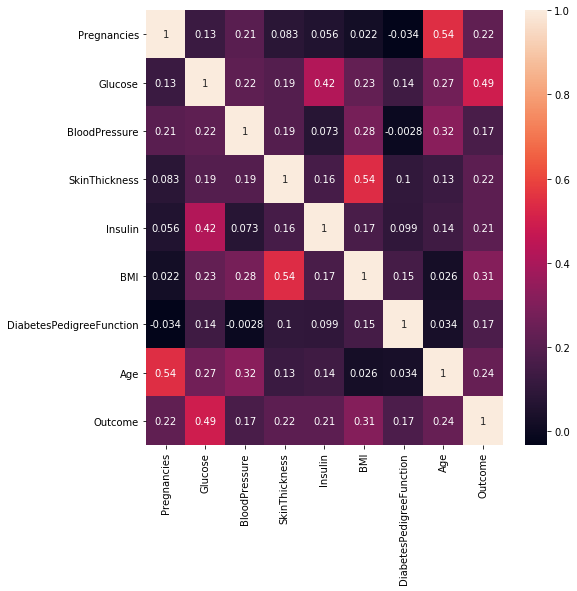

In [56]:
# Find correlations between features. To understand the highly correlated data and its association
import matplotlib.pyplot as plt
sns.heatmap(diabetes.corr(),annot=True)
fig = plt.gcf()
fig.set_size_inches(8,8)

## Feature Selection

In [57]:
# Features importance 
# Find the variable importance using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
x=diabetes[diabetes.columns[:8]]
y=diabetes.Outcome
clf.fit(x,y)
feature_imp = pd.DataFrame(clf.feature_importances_,index=x.columns)
feature_imp.sort_values(by = 0 , ascending = False)

,0
Glucose,0.243233
BMI,0.156683
Age,0.150473
DiabetesPedigreeFunction,0.118004
Insulin,0.094346
SkinThickness,0.085924
BloodPressure,0.080688
Pregnancies,0.070650


# III. Model Building 

Model building is the vital step to train the model on training data. In model building, initially I have started building various linear models that includes **Logistic Regression, Naive Bayes, and SVM.**

Before starting modeling, the dataset is spilt into two part, training and test set. The model is first train on training set and then performance of model is evaluated based on test set.

As this is classifier problem, model performance can be measured on accuracy of model. Accuracy is nothing but the how accurately model has predicted the class on test set.

In [58]:
# Data Splitting
# Training and testing
x['Outcome']=diabetes['Outcome']
outcome=x['Outcome']
from sklearn.model_selection import train_test_split
train,test= train_test_split(x, test_size=0.20,random_state=0,stratify=diabetes['Outcome'])
train_X=train[train.columns[:-1]]
test_X=test[test.columns[:-1]]
train_Y=train['Outcome']
test_Y=test['Outcome']

## Model Definition: 
### 1. Naive Bayes

In [59]:
#Naive Bayes Classifier
from sklearn import naive_bayes
nbclf = naive_bayes.GaussianNB()
nbclf.fit(train_X,train_Y)
nbclf.score(test_X,test_Y)


0.7532467532467533

### 2. Neural network - Back propogation

In [60]:
#NN Back Propogation
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(train_X,train_Y)
clf.score(test_X,test_Y)

0.6883116883116883

### 3. Logistic Regression 

In [61]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
clf1.fit(train_X,train_Y)
clf1.score(test_X,test_Y)

0.7792207792207793

### 4. Support Vector Machine

In [62]:
#SVM
from sklearn import svm
clf = svm.SVC(kernel="linear")
clf.fit(train_X,train_Y)
clf.score(test_X,test_Y)

0.7597402597402597

### 5. Decision Tree

In [63]:
#DTClassifier
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier()
dtclf.fit(train_X,train_Y)
dtclf.score(test_X,test_Y)

0.6753246753246753

### Generalize to run different models

In [64]:
# Define Model names and Model classifier methods
Models = ["Naive Bayes", "NN-Backpropogation", "Logistic Regression", "Support Vector Machine", "Decision Tree",]
clfs = [naive_bayes.GaussianNB(),MLPClassifier(), LogisticRegression(), svm.SVC(kernel="linear"), DecisionTreeClassifier(), ]
result = []

for clff in clfs:
    clff.fit(train_X,train_Y)
    acc = clff.score(test_X,test_Y)
    result.append(acc)
result_df = pd.DataFrame(result,index=Models)
result_df.columns=["Accuracy"]
result_df.sort_values(by="Accuracy",ascending=False)

,Accuracy
Logistic Regression,0.779221
Support Vector Machine,0.759740
Naive Bayes,0.753247
NN-Backpropogation,0.727273
Decision Tree,0.675325


# IV. Model Evaluation

All models are evaluated based on certain performance metrics. For classification, primary key metrics are accuracy, sensitivity, specificity, cross valiation, precision, recall, F-1 score, ROC, and AUC. 

In [65]:
result_df['Accuracy']

Naive Bayes               0.753247
NN-Backpropogation        0.727273
Logistic Regression       0.779221
Support Vector Machine    0.759740
Decision Tree             0.675325
Name: Accuracy, dtype: float64

# V. Results

In [66]:
# Plot bar comparison of normal accuracy and cross validation accuracy
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

Accuracy = go.Bar(
            x= Models,
            y= result_df['Accuracy'],
            text=result_df['Accuracy'],
            textposition = 'auto',
            name = 'Models'
    )

data = [Accuracy]
iplot(data, filename='basic-bar')

### Looking at this Logistic Classifier performed the best with accuracy 77.92%.